In [4]:
from pylab import*
from matplotlib import*
from scipy import*

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sin
  del sys.path[0]
C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in cos
  # This is added back by InteractiveShellApp.init_path()


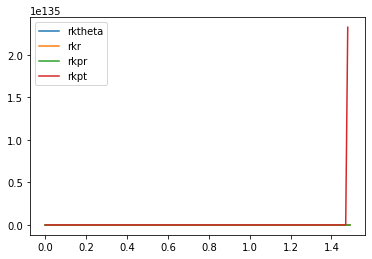

In [5]:
M=2
m=1
mu=M/m
gf=9.81

def k(t,theta,r,pr,pt):
    return (pt)/(m*(r**2))
def g(t,theta,r,pr,pt):
    return (pr/(M+m))
def j(t,theta,r,pr,pt):
    return ((pt**2)/(m*(r**3))+(gf*(m*cos(theta)-M)))
def f(t,theta,r,pr,pt):
    return -m*gf*r*sin(theta)

N=10000
a,b=0,100
h=(b-a)/N
t,theta,r,pr,pt=zeros(N),zeros(N),zeros(N),zeros(N),zeros(N)
t[0],theta[0],r[0],pr[0],pt[0]=a,(pi/2)*(pi/180),1,0,0

for i in range(1,N):
    k11=h*f(t[i-1],theta[i-1],r[i-1],pr[i-1],pt[i-1])
    k12=h*g(t[i-1],theta[i-1],r[i-1],pr[i-1],pt[i-1])
    k13=h*k(t[i-1],theta[i-1],r[i-1],pr[i-1],pt[i-1])
    k14=h*j(t[i-1],theta[i-1],r[i-1],pr[i-1],pt[i-1])
    
    k21=h*f(t[i-1]+0.5*h,theta[i-1]+0.5*k11,r[i-1]+0.5*k12,pr[i-1]+0.5*k13,pt[i-1]+0.5*k14)
    k22=h*g(t[i-1]+0.5*h,theta[i-1]+0.5*k11,r[i-1]+0.5*k12,pr[i-1]+0.5*k13,pt[i-1]+0.5*k14)
    k23=h*k(t[i-1]+0.5*h,theta[i-1]+0.5*k11,r[i-1]+0.5*k12,pr[i-1]+0.5*k13,pt[i-1]+0.5*k14)
    k24=h*j(t[i-1]+0.5*h,theta[i-1]+0.5*k11,r[i-1]+0.5*k12,pr[i-1]+0.5*k13,pt[i-1]+0.5*k14)
    
    k31=h*f(t[i-1]+0.5*h,theta[i-1]+0.5*k21,r[i-1]+0.5*k22,pr[i-1]+0.5*k23,pt[i-1]+0.5*k24)
    k32=h*g(t[i-1]+0.5*h,theta[i-1]+0.5*k21,r[i-1]+0.5*k22,pr[i-1]+0.5*k23,pt[i-1]+0.5*k24)
    k33=h*k(t[i-1]+0.5*h,theta[i-1]+0.5*k21,r[i-1]+0.5*k22,pr[i-1]+0.5*k23,pt[i-1]+0.5*k24)
    k34=h*j(t[i-1]+0.5*h,theta[i-1]+0.5*k21,r[i-1]+0.5*k22,pr[i-1]+0.5*k23,pt[i-1]+0.5*k24)
    
    k41=h*f(t[i-1]+h,theta[i-1]+k31,r[i-1]+k32,pr[i-1]+k33,pt[i-1]+k34)
    k42=h*g(t[i-1]+h,theta[i-1]+k31,r[i-1]+k32,pr[i-1]+k33,pt[i-1]+k34)
    k43=h*k(t[i-1]+h,theta[i-1]+k31,r[i-1]+k32,pr[i-1]+k33,pt[i-1]+k34)
    k44=h*j(t[i-1]+h,theta[i-1]+k31,r[i-1]+k32,pr[i-1]+k33,pt[i-1]+k34)
    
    theta[i]=theta[i-1]+(1/6)*(k11+2*k21+2*k31+k41)
    r[i]=r[i-1]+(1/6)*(k12+2*k22+2*k32+k42)
    pr[i]=pr[i-1]+(1/6)*(k13+2*k23+2*k33+k43)
    pt[i]=pt[i-1]+(1/6)*(k14+2*k24+2*k34+k44)
    t[i]=t[i-1]+h

    
    
plot(t,theta,label='rktheta')
plot(t,r,label='rkr')
plot(t,pr,label='rkpr')
plot(t,pt,label='rkpt')

pylab.legend()
show()

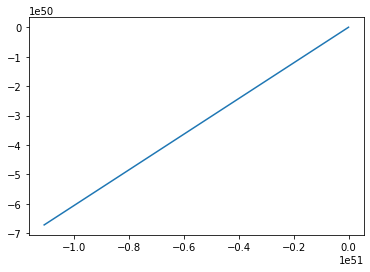

In [6]:
ux=r*sin(degrees(theta))
uy=(-r)*cos(degrees(theta))
plot(ux,uy)


(-1, 1)

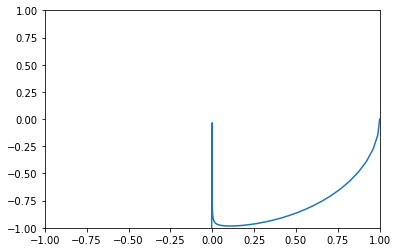

In [7]:
def fx(r,theta):
    return r*sin(degrees(theta))
def fy(r,theta):
    return -r*cos(degrees(theta))
plot(fx(r,theta),fy(r,theta))
xlim(-1,1)
ylim(-1,1)
